In [37]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
import re
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

spacex just launched another batch of satellites into orbit pushing humanity one step closer to global internet and aliens finally getting tiktok
      at this point even mars has better wifi than my college hostel
['spacex', 'just', 'launched', 'another', 'batch', 'of', 'satellites', 'into', 'orbit', 'pushing', 'humanity', 'one', 'step', 'closer', 'to', 'global', 'internet', 'and', 'aliens', 'finally', 'getting', 'tiktok', 'at', 'this', 'point', 'even', 'mars', 'has', 'better', 'wifi', 'than', 'my', 'college', 'hostel']
['SpaceX just launched another batch of satellites into orbit, pushing humanity one step closer to global internet —and aliens finally getting TikTok.', 'At this point, even Mars has better Wi-Fi than my college hostel.']
['spacex', 'launched', 'another', 'batch', 'satellites', 'orbit', 'pushing', 'humanity', 'one', 'step', 'closer', 'global', 'internet', 'aliens', 'finally', 'getting', 'tiktok', 'point', 'even', 'mars', 'better', 'wifi', 'college', 'hostel']
<FreqDist

<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

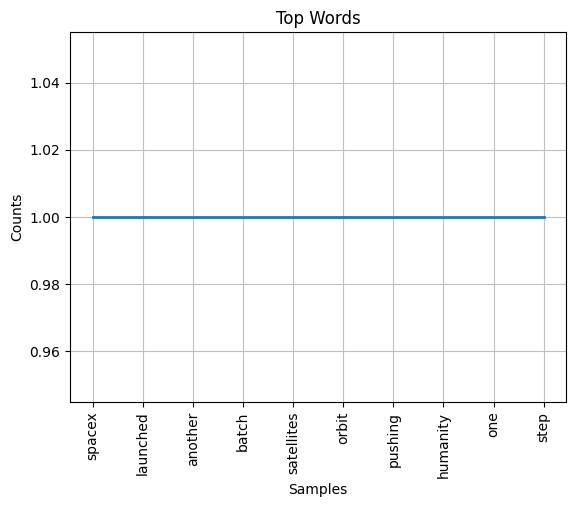

In [38]:
# q1

txt = """SpaceX just launched another batch of satellites into orbit, pushing humanity one step closer to global internet —and aliens finally getting TikTok.
      At this point, even Mars has better Wi-Fi than my college hostel."""

txt_clean = re.sub(r'[^\w\s]', '', txt.lower())
print(txt_clean)

w_tokens = word_tokenize(txt_clean)
s_tokens = sent_tokenize(txt)
print(w_tokens)
print(s_tokens)

sw = set(stopwords.words('english'))
w_filtered = [w for w in w_tokens if w not in sw]
print(w_filtered)

fd = FreqDist(w_filtered)
print(fd)
fd.plot(10, title="Top Words")

In [39]:
# q2

ps = PorterStemmer()
ls = LancasterStemmer()
lm = WordNetLemmatizer()

ps_words = [ps.stem(w) for w in w_filtered]
ls_words = [ls.stem(w) for w in w_filtered]
lm_words = [lm.lemmatize(w) for w in w_filtered]

print("\nOriginal:", w_filtered)
print("Porter:", ps_words)
print("Lancaster:", ls_words)
print("Lemmatized:", lm_words)


Original: ['spacex', 'launched', 'another', 'batch', 'satellites', 'orbit', 'pushing', 'humanity', 'one', 'step', 'closer', 'global', 'internet', 'aliens', 'finally', 'getting', 'tiktok', 'point', 'even', 'mars', 'better', 'wifi', 'college', 'hostel']
Porter: ['spacex', 'launch', 'anoth', 'batch', 'satellit', 'orbit', 'push', 'human', 'one', 'step', 'closer', 'global', 'internet', 'alien', 'final', 'get', 'tiktok', 'point', 'even', 'mar', 'better', 'wifi', 'colleg', 'hostel']
Lancaster: ['spacex', 'launch', 'anoth', 'batch', 'satellit', 'orbit', 'push', 'hum', 'on', 'step', 'clos', 'glob', 'internet', 'aly', 'fin', 'get', 'tiktok', 'point', 'ev', 'mar', 'bet', 'wif', 'colleg', 'hostel']
Lemmatized: ['spacex', 'launched', 'another', 'batch', 'satellite', 'orbit', 'pushing', 'humanity', 'one', 'step', 'closer', 'global', 'internet', 'alien', 'finally', 'getting', 'tiktok', 'point', 'even', 'mar', 'better', 'wifi', 'college', 'hostel']


In [40]:
# q3

w_long = re.findall(r'\b\w{6,}\b', txt_clean)
print(w_long)

nums = re.findall(r'\d+', txt_clean)
print(nums)

cap = re.findall(r'\b[A-Z][a-z]+\b', txt)
print(cap)

alpha = re.findall(r'\b[a-z]+\b', txt_clean)
print(alpha)

vowel = re.findall(r'\b[aeiou][a-z]*\b', txt_clean)
print(vowel)


['spacex', 'launched', 'another', 'satellites', 'pushing', 'humanity', 'closer', 'global', 'internet', 'aliens', 'finally', 'getting', 'tiktok', 'better', 'college', 'hostel']
[]
['At', 'Mars', 'Wi', 'Fi']
['spacex', 'just', 'launched', 'another', 'batch', 'of', 'satellites', 'into', 'orbit', 'pushing', 'humanity', 'one', 'step', 'closer', 'to', 'global', 'internet', 'and', 'aliens', 'finally', 'getting', 'tiktok', 'at', 'this', 'point', 'even', 'mars', 'has', 'better', 'wifi', 'than', 'my', 'college', 'hostel']
['another', 'of', 'into', 'orbit', 'one', 'internet', 'and', 'aliens', 'at', 'even']


In [42]:
# q4

txt1 = txt + "Martians reportedly aren't entirely sure about cat videos, finding them perplexing, but they undeniably love dance trends—an enthusiasm that's rated at least a solid 9.5. Contact: space@example.com  or visit https://space.com. Call +91 9876543210!"
def tok_custom(text):
    pattern = r"""
        \b\w+(?:-\w+)+\b       # 1. Match any hyphenated word (e.g. wi-fi)
        | \b\d+\.\d+\b         # 2. Match decimal numbers intact (e.g. 9.5)
        | \b\w+(?:'\w+)?\b     # 3. Match words and contractions (e.g. aren't, that's)
    """
    return re.findall(pattern, text, flags=re.VERBOSE)

tokens = tok_custom(txt1.lower())
print(tokens)

txt_sub = txt1
txt_sub = re.sub(r'\S+@\S+', '<EMAIL>', txt_sub)
txt_sub = re.sub(r'https?://\S+', '<URL>', txt_sub)
txt_sub = re.sub(r'(\+\d{1,3} \d{10}|\d{3}-\d{3}-\d{4})', '<PHONE>', txt_sub)
print(txt_sub)

['spacex', 'just', 'launched', 'another', 'batch', 'of', 'satellites', 'into', 'orbit', 'pushing', 'humanity', 'one', 'step', 'closer', 'to', 'global', 'internet', 'and', 'aliens', 'finally', 'getting', 'tiktok', 'at', 'this', 'point', 'even', 'mars', 'has', 'better', 'wi-fi', 'than', 'my', 'college', 'hostel', 'martians', 'reportedly', "aren't", 'entirely', 'sure', 'about', 'cat', 'videos', 'finding', 'them', 'perplexing', 'but', 'they', 'undeniably', 'love', 'dance', 'trends', 'an', 'enthusiasm', "that's", 'rated', 'at', 'least', 'a', 'solid', '9.5', 'contact', 'space', 'example', 'com', 'or', 'visit', 'https', 'space', 'com', 'call', '91', '9876543210']
SpaceX just launched another batch of satellites into orbit, pushing humanity one step closer to global internet —and aliens finally getting TikTok.
      At this point, even Mars has better Wi-Fi than my college hostel.Martians reportedly aren't entirely sure about cat videos, finding them perplexing, but they undeniably love dance 